# 0. 変更履歴

* 2019/05/07 初版
* 2019/05/10 第2版
    * pandas print →　display
    * 
    
**5/19追加処理**
* 外れ値を外す。
    * カテゴリ系のデータについては、項目の種類が多いmain_category,countryは、ある程度纏める。
    * 数値系のデータについては、四分位範囲を用いて、外れ値を外す。
* categoryは、Main_categoryと種類が違いそうなので、残す。
* StatusがLiveのものは結果が出ていないので外す。
* 項目の種類が多いものは、いくつかに纏める。

# 1. 通し課題
kaggleのデータセットを用いてモデルを構築し結果を公開することを本講座の通し課題とします。

* 公開先は、 kaggleのKernelsまたはGithubとします
* Slackの所属チャンネルにipynbファイルを直接貼っても良いこととします
* 課題は、以下の2つから選んで下さい
    * 課題① Kickstarter Projects クラウドファンデイングが 成功するか(state)を予測
    * 課題② Car Fuel Consumption 100kmあたりのガソリン消費量(consume)を予測

# 2. 選択課題
以下の課題①を選択する。
* Kickstarter Projects (https://www.kaggle.com/kemical/kickstarter-projects)


# 3. 予測方針
Scikit-learnを用いて、ロジスティック回帰にて実装

# 4. プログラム

## 4-1. データ分析
### 4-1-1. データ、項目の理解
* データの理解
以下の2つのデータがあるが、ks-projects-201612は、古いデータと理解。よって、ks-projects-201801のデータを利用して、予測モデルを構築する。
  * ks-projects-201612
  * ks-projects-201801

* 項目の確認と理解
  * ID：　連番
  * name：　プロジェクト名
  * category：　詳細なカテゴリー
  * main_category：　大きなカテゴリー
  * currency：　pledgedの通貨
  * deadline：　クラウドファンディングの募集締め切り日
  * goal：　クラウドファンディングの目標金額（各国の通貨）
  * launched：　クラウドファンディングの募集開始日
  * pledged：　クラウドファンディングの集まった金額
  * state：　成否
  * backers：　クラウドファンディングした人の数
  * country：　クラウドファンディング主催者の国
  * usd pledged：　クラウドファンディングの集まった金額（KSによってUSDに変換されたもの）
  * usd_pledged_real：　クラウドファンディングの集まった金額（fixer.io apiによってUSDに変換されたもの）
  * usd_goal_real：　クラウドファンディングの目標金額（fixer.io apiによってUSDに変換されたもの）

### 4-1-2. データ分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy import stats

In [2]:
df_company_work = pd.read_csv("ks-projects-201801.csv")
print('*****サンプルデータ*****')
display(df_company_work.head())
print()
print('*****データ統計*****')
display(df_company_work.describe())
print()
print('*****the number of rows and cloumns*****')
display(df_company_work.shape)
print()
print('*****column*****')
display(df_company_work.columns)
print()
print('*****type of column*****')
display(df_company_work.dtypes)
print()
print('*****項目の種類*****')
print('**Contents of ID** ')
print(df_company_work['ID'].unique())
print(df_company_work['ID'].value_counts())
print()
print('**contents of name** ')
print(df_company_work['name'].unique())
print(df_company_work['name'].value_counts())
print()
print('**contents of category** ')
print(df_company_work['category'].unique())
print(df_company_work['category'].value_counts())
print()
print('**contents of main_category** ')
print(df_company_work['main_category'].unique())
print(df_company_work['main_category'].value_counts())
print()
print('**contents of currency** ')
print(df_company_work['currency'].unique())
print(df_company_work['currency'].value_counts())
print()
print('**contents of deadline** ')
print(df_company_work['deadline'].unique())
print(df_company_work['deadline'].value_counts())
print()
print('**contents of goal** ')
print(df_company_work['goal'].unique())
print(df_company_work['goal'].value_counts())
print()
print('**contents of launched** ')
print(df_company_work['launched'].unique())
print(df_company_work['launched'].value_counts())
print()
print('**contents of pledged** ')
print(df_company_work['pledged'].unique())
print(df_company_work['pledged'].value_counts())
print()
print('**contents of state** ')
print(df_company_work['state'].unique())
print(df_company_work['state'].value_counts())
print()
print('**contents of backers** ')
print(df_company_work['backers'].unique())
print(df_company_work['backers'].value_counts())
print()
print('**contents of country** ')
print(df_company_work['country'].unique())
print(df_company_work['country'].value_counts())
print()
print('**contents of usd pledged** ')
print(df_company_work['usd pledged'].unique())
print(df_company_work['usd pledged'].value_counts())
print()
print('**contents of usd_pledged_real** ')
print(df_company_work['usd_pledged_real'].unique())
print(df_company_work['usd_pledged_real'].value_counts())
print()
print('**contents of usd_goal_real** ')
print(df_company_work['usd_goal_real'].unique())
print(df_company_work['usd_goal_real'].value_counts())
print()

print('*****NULLチェック*****')
print('check null',df_company_work.isnull().sum())

print('*****その他*****')
print(df_company_work.groupby(['country','state']).size())


*****サンプルデータ*****


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00



*****データ統計*****


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08



*****the number of rows and cloumns*****


(378661, 15)


*****column*****


Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


*****type of column*****


ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


*****項目の種類*****
**Contents of ID** 
[1000002330 1000003930 1000004038 ...  999986353  999987933  999988282]
1294469119    1
925977744     1
959180384     1
1003356565    1
926393412     1
809374103     1
1116627353    1
1710038766    1
1138639261    1
1360941471    1
562018722     1
425689509     1
541927920     1
577401272     1
1813483943    1
2106587562    1
57143723      1
1942471085    1
1319623086    1
1088934319    1
217524656     1
1989091761    1
675160465     1
1233047951    1
1453775246    1
450806157     1
839113112     1
62458228      1
2027487605    1
789125494     1
             ..
941767661     1
77713075      1
317903856     1
1457189876    1
184738806     1
1820519415    1
33260506      1
25828679      1
1321948096    1
488525947     1
572169672     1
975391923     1
2125206928    1
65938870      1
1704688581    1
1051943878    1
1520135111    1
1406866376    1
947136390     1
1520108490    1
694887374     1
1637810574    1
364630992     1
1032575953    1
1119601618 

2014-08-08    705
2014-08-10    558
2014-08-07    541
2015-05-01    489
2014-08-09    477
2015-07-01    449
2015-04-01    430
2014-08-15    423
2014-08-31    420
2014-08-14    413
2014-08-13    394
2014-08-20    394
2015-04-30    391
2014-11-01    379
2015-01-01    378
2015-10-01    375
2014-08-16    361
2015-05-31    359
2017-12-01    356
2015-03-01    355
2015-08-01    349
2014-09-12    344
2014-09-07    344
2015-06-01    343
2014-10-31    343
2015-04-03    338
2014-08-11    337
2014-08-17    336
2016-04-01    334
2015-07-31    334
             ... 
2009-12-28      1
2009-09-24      1
2009-06-09      1
2009-08-06      1
2009-05-22      1
2009-09-08      1
2009-06-17      1
2009-09-04      1
2009-08-18      1
2009-09-18      1
2009-06-20      1
2009-10-27      1
2009-07-06      1
2009-09-28      1
2009-08-17      1
2009-09-07      1
2009-05-20      1
2009-08-28      1
2009-10-23      1
2009-07-26      1
2010-02-19      1
2009-11-13      1
2009-08-27      1
2009-07-20      1
2009-05-03

check null ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
*****その他*****
country  state     
AT       canceled          91
         failed           378
         live              15
         successful       107
         suspended          6
AU       canceled        1065
         failed          4606
         live              70
         successful      2010
         suspended         88
BE       canceled          74
         failed           371
         live              12
         successful       152
         suspended          8
CA       canceled        2138
         failed          8236
         live             132
         successful      41

## 4-2. 予測モデル 
### 4-2-1 予測モデルの考え方
* 目的変数
  * 目的変数として、結果系の項目である以下の候補が考えられる。今回は、まず成否の判定を行うこととするため、Stateとする。
    * state
    * backers
    * pledged
    * usd_pledged
    * usd_pledged_real
* 説明変数
  * 説明変数については、以下の理由により、項目の削除、統合を行う。
    * 成否の予測に必要のない項目の削除
       * ID
       * Name
    * 成否の予測時に知りえない項目の削除。
       * pledged：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * usd pledged：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * usd_pledged_real：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * backers：　クラウドファンディングした人の数は、予測時(事前)には知りえない情報のため、説明変数から削除
    * 他の項目と意味が同じ,似ている項目を削除
       * goal：　usd_goal_realと単位が異なるだけの項目のため、削除。
       * currency：　countryとほぼ同じ意味合い。また、USDに換算するためだけの項目のため、削除。
    * 統合できる項目
       * launchとdeadlineは、期間として、数値化して表現し、別項目として、管理するため、削除。また、数値化されるため、モデルにも使いやすい。
    * 数値項目でないものを、one-hotベクトル化。
       * main_category　(数が多いので、トップ10のみに削減)
       * main_category　(数が多いので、トップ10のみに削減)
       * state
       * country　(数が多いので、トップ10のみに削減)
    * 0～1に収まっていない項目を標準化
       * usd_goal_real
       * day_diff
   
### 4-2-2 予測モデルのまとめ
* 目的変数
  * stateをone-hotベクトル化したもの
* 説明変数
  * usd_goal_real
  * main_categoryをone-hotベクトル化したもの
  * categoryをone-hotベクトル化したもの
  * countryをone-hotベクトル化したもの
  * deadline - launch
* 条件
  * status = live まだ結果がでていないので、削除。
  
## 4-3. データ前処理

In [3]:
#state:liveは、結果のデータではないので、削除
df_company_work = df_company_work[df_company_work['state'] != 'live']
display(df_company_work.shape)

#数が少ないものはOthersに変更
df_company_work.loc[(df_company_work['category'] != 'Product Design') & (df_company_work['category'] != 'Documentary') & (df_company_work['category'] != 'Music') & (df_company_work['category'] != 'Tabletop Games') & (df_company_work['category'] != 'Shorts') & (df_company_work['category'] != 'Video Games') & (df_company_work['category'] != 'Food') & (df_company_work['category'] != 'Film & Video') & (df_company_work['category'] != 'Fiction') & (df_company_work['category'] != 'Fashion'), 'category' ] = 'Others'
#category_target_list = ['Product Design','Documentary']
#df_company_work.loc[(df_company_work['category'] in category_target_list), 'category' ] = 'Others'
df_company_work.loc[(df_company_work['country'] != 'US') & (df_company_work['country'] != 'GB') & (df_company_work['country'] != 'CA') & (df_company_work['country'] != 'AU') & (df_company_work['country'] != 'DE') & (df_company_work['country'] != 'N,0"') & (df_company_work['country'] != 'FR') & (df_company_work['country'] != 'IT') & (df_company_work['country'] != 'NL') & (df_company_work['country'] != 'ES'), 'country' ] = 'Others'

print('**contents of main_category** ')
print(df_company_work['category'].unique())
print(df_company_work['category'].value_counts())
print('**contents of country** ')
print(df_company_work['country'].unique())
print(df_company_work['country'].value_counts())
display(df_company_work.shape)

(375862, 15)

**contents of main_category** 
['Others' 'Music' 'Film & Video' 'Food' 'Product Design' 'Documentary'
 'Tabletop Games' 'Fashion' 'Fiction' 'Video Games' 'Shorts']
Others            244787
Product Design     22077
Documentary        16082
Music              15647
Tabletop Games     14072
Shorts             12311
Video Games        11744
Food               11454
Film & Video       10054
Fiction             9120
Fashion             8514
Name: category, dtype: int64
**contents of country** 
['GB' 'US' 'CA' 'AU' 'Others' 'IT' 'DE' 'ES' 'N,0"' 'FR' 'NL']
US        290887
GB         33393
CA         14624
Others     10551
AU          7769
DE          4096
N,0"        3796
FR          2887
NL          2833
IT          2802
ES          2224
Name: country, dtype: int64


(375862, 15)

In [4]:
#必要のない項目の削除
df_company_work = df_company_work.drop(['ID','name','currency','goal','pledged','backers','usd pledged','usd_pledged_real'], axis=1)

#one-hotベクトル化
df_company_work = pd.get_dummies(df_company_work, columns = ['category','main_category', 'state', 'country'])
df_company_work = df_company_work.drop(['country_Others','category_Others','state_canceled','state_failed','state_suspended','state_undefined'], axis=1)

#launch deadline 数値化、日数に変換
df_company_work.deadline = pd.to_datetime(df_company_work.deadline, format='%Y-%m-%d')
df_company_work.launched = pd.to_datetime(df_company_work.launched, format='%Y-%m-%d')
df_company_work['day_diff'] = (df_company_work.deadline - df_company_work.launched)
df_company_work.day_diff = df_company_work.day_diff / np.timedelta64(1, 'D')

df_company = df_company_work.drop(['deadline', 'launched'], axis=1)

#前処理後データ確認
print('******前処理後データ確認*****')
display(df_company.head())
display(df_company.describe())
print('the number of rows and cloumns：',df_company.shape)
print('column：',df_company.columns)
print('type of column：',df_company.dtypes)


******前処理後データ確認*****


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
0,1533.95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,58.491343
1,30000.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,59.802813
2,45000.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,44.985532
3,5000.00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,29.858206
4,19500.00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55.642326


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
count,3.758620e+05,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,...,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000
mean,4.532720e+04,0.042787,0.022652,0.024264,0.026749,0.030474,0.041630,0.058737,0.032754,0.037439,...,0.038908,0.010898,0.005917,0.007681,0.088844,0.007455,0.010099,0.007537,0.773920,33.875787
std,1.145865e+06,0.202377,0.148791,0.153869,0.161350,0.171888,0.199742,0.235132,0.177992,0.189836,...,0.193376,0.103821,0.076695,0.087304,0.284518,0.086019,0.099987,0.086490,0.418292,66.147023
min,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005058
25%,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.096343
50%,5.480000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.683582
75%,1.550000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.316120
max,1.663614e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16738.958333


the number of rows and cloumns： (375862, 38)
column： Index(['usd_goal_real', 'category_Documentary', 'category_Fashion',
       'category_Fiction', 'category_Film & Video', 'category_Food',
       'category_Music', 'category_Product Design', 'category_Shorts',
       'category_Tabletop Games', 'category_Video Games', 'main_category_Art',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'state_successful', 'country_AU', 'country_CA',
       'country_DE', 'country_ES', 'country_FR', 'country_GB', 'country_IT',
       'country_N,0"', 'country_NL', 'country_US', 'day_diff'],
      dtype='object')
type of column： usd_goal_real               

## 4-4. 訓練データ、テストデータ作成

In [5]:
#訓練・テストデータ作成
df_company_train, df_company_test = train_test_split(df_company, test_size=0.3)
display(df_company_train.describe())
display(df_company_test.describe())

,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
count,2.631030e+05,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,...,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000,263103.000000
mean,4.486118e+04,0.042447,0.022603,0.024245,0.026625,0.030376,0.041721,0.058411,0.032759,0.037673,...,0.038798,0.010889,0.006005,0.007814,0.089193,0.007381,0.010239,0.007484,0.773218,33.796221
std,1.108210e+06,0.201608,0.148635,0.153810,0.160984,0.171620,0.199952,0.234519,0.178006,0.190406,...,0.193115,0.103782,0.077261,0.088053,0.285023,0.085596,0.100670,0.086185,0.418751,60.796928
min,4.900000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005058
25%,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.095770
50%,5.472170e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.673611
75%,1.550000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.237344
max,1.101698e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16738.958333


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
count,1.127590e+05,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,...,112759.000000,112759.000000,112759.000000,112759.00000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000,112759.000000
mean,4.641457e+04,0.043580,0.022765,0.024308,0.027040,0.030703,0.041416,0.059499,0.032742,0.036893,...,0.039163,0.010917,0.005711,0.00737,0.088028,0.007627,0.009773,0.007662,0.775557,34.061440
std,1.229252e+06,0.204159,0.149155,0.154006,0.162201,0.172512,0.199251,0.236557,0.177962,0.188500,...,0.193984,0.103913,0.075357,0.08553,0.283338,0.086999,0.098375,0.087199,0.417217,77.201879
min,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035498
25%,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,29.097564
50%,5.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,29.704005
75%,1.550000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,36.749063
max,1.663614e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,14866.958333


## 4-5. 訓練
### 4-5-1. 訓練データの前処理

In [6]:
# 外れ値削除

#usd_goal_real
#四分位範囲を計算
usd_goal_real_q1 = stats.scoreatpercentile(df_company_train.usd_goal_real, 25) #第一四分位数（=25パーセンタイル）
usd_goal_real_q3 = stats.scoreatpercentile(df_company_train.usd_goal_real, 75) #第三四分位数（=75パーセンタイル）
usd_goal_real_iqr = usd_goal_real_q3 - usd_goal_real_q1 #四分位範囲

#外れ値の範囲を計算する
usd_goal_real_iqr_min = usd_goal_real_q1 - (usd_goal_real_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を引き算。
usd_goal_real_iqr_max = usd_goal_real_q3 + (usd_goal_real_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を。

#print(usd_goal_real_iqr_min)
#print(usd_goal_real_iqr_max)

#範囲から外れている値を除く
df_company_train = df_company_train[df_company_train['usd_goal_real'] < usd_goal_real_iqr_max]
df_company_train = df_company_train[df_company_train['usd_goal_real'] > usd_goal_real_iqr_min]
display(df_company_train.describe())

#day_diff
#四分位範囲を計算
day_diff_q1 = stats.scoreatpercentile(df_company_train.day_diff, 25) #第一四分位数（=25パーセンタイル）
day_diff_q3 = stats.scoreatpercentile(df_company_train.day_diff, 75) #第三四分位数（=75パーセンタイル）
day_diff_iqr = usd_goal_real_q3 - usd_goal_real_q1 #四分位範囲

#外れ値の範囲を計算する
day_diff_iqr_min = day_diff_q1 - (day_diff_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を引き算。
day_diff_iqr_max = day_diff_q3 + (day_diff_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を。

#print(usd_goal_real_iqr_min)
#print(usd_goal_real_iqr_max)

#範囲から外れている値を除く
#df_company = df_company.query('usd_goal_real < usd_goal_real_iqr_max')
df_company_train = df_company_train[df_company_train['day_diff'] < day_diff_iqr_max]
df_company_train = df_company_train[df_company_train['day_diff'] > day_diff_iqr_min]
display(df_company_train.describe())


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
count,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,...,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000
mean,7649.173199,0.039188,0.023726,0.026724,0.024914,0.029908,0.045150,0.053017,0.036401,0.039378,...,0.037996,0.009945,0.005603,0.007258,0.088645,0.006567,0.011604,0.006735,0.778079,33.340002
std,8096.370427,0.194042,0.152195,0.161277,0.155864,0.170335,0.207633,0.224067,0.187287,0.194493,...,0.191186,0.099228,0.074645,0.084883,0.284231,0.080768,0.107095,0.081791,0.415539,64.639817
min,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005058
25%,1708.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.075324
50%,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.605185
75%,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.901548
max,35742.880000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16738.958333


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
count,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,...,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000,231474.000000
mean,7649.173199,0.039188,0.023726,0.026724,0.024914,0.029908,0.045150,0.053017,0.036401,0.039378,...,0.037996,0.009945,0.005603,0.007258,0.088645,0.006567,0.011604,0.006735,0.778079,33.340002
std,8096.370427,0.194042,0.152195,0.161277,0.155864,0.170335,0.207633,0.224067,0.187287,0.194493,...,0.191186,0.099228,0.074645,0.084883,0.284231,0.080768,0.107095,0.081791,0.415539,64.639817
min,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005058
25%,1708.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.075324
50%,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.605185
75%,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.901548
max,35742.880000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16738.958333


In [7]:
#標準化
df_company_train.usd_goal_real = zscore(df_company_train.usd_goal_real)
df_company_train.day_diff = zscore(df_company_train.day_diff)

#前処理後データ確認
print('******前処理後データ確認*****')
display(df_company_train)
#print(df_company.head())
#print(df_company.describe())
#print('the number of rows and cloumns：',df_company.shape)
#print('column：',df_company.columns)
#print('type of column：',df_company.dtypes)

******前処理後データ確認*****


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
211152,-0.473167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.065149
146693,1.135266,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.090163
358066,0.043331,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.155313
282498,-0.327206,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.057296
298896,-0.915707,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-0.079306
36073,-0.809633,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-0.062578
92647,-0.327206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.054252
260082,-0.327206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.092381
221788,2.266555,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.054215
171408,-0.796553,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.155293


### 4-6. テスト
### 4-6-1. テスト前処理

In [8]:
#テストデータ標準化
df_company_test.usd_goal_real = zscore(df_company_test.usd_goal_real)
df_company_test.day_diff = zscore(df_company_test.day_diff)

#前処理後データ確認
print('******前処理後データ確認*****')
display(df_company_test)


******前処理後データ確認*****


C:\Users\tbouc\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,usd_goal_real,category_Documentary,category_Fashion,category_Fiction,category_Film & Video,category_Food,category_Music,category_Product Design,category_Shorts,category_Tabletop Games,...,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,day_diff
258213,-0.019861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.065909
136904,-0.035725,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.256734
324014,0.019187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.325217
365792,-0.025556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.325070
88843,-0.005218,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.128268
162841,-0.032878,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-0.044457
240137,-0.031331,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-0.064285
297374,0.163621,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.324119
362090,-0.037108,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.182761
79527,-0.029623,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.062863


# 5. 前回までの纏め

外れ値の削除、標準化により、Precision以外は、かなりの改善が見られたが、モデルとしての限界を感じる。次は、NNで実装を試みたい。

* ＜DAY1の結果：liveデータあり、外れ値あり、正規化、種類多い項目のそのまま＞
  * テストデータの対数尤度 = -14.330
  * テストデータの正答率（Accuracy） = 58.512%
  * テストデータの適合率（Precision） = 76.263%
  * テストデータの再現率（Recall） = 51.708%
  * テストデータのF1値（F1-score） = 61.630%

* ＜DAY2の結果：liveデータなし、外れ値削除、標準化、種類多い項目のまとめ＞
  * テストデータの対数尤度 = -11.411
  * テストデータの正答率（Accuracy） = 66.962%
  * テストデータの適合率（Precision） = 69.886%
  * テストデータの再現率（Recall） = 85.423%
  * テストデータのF1値（F1-score） = 76.877%

# 5. NNで実装

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # 交差検証法に関する関数
import pickle
from scipy import stats

from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, RMSProp

from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 性能評価に関する関数

from common.functions import *

In [10]:
y_train = df_company_train["state_successful"].values
X_train = df_company_train.drop(['state_successful'], axis=1).values
y_test = df_company_test["state_successful"].values
X_test = df_company_test.drop(['state_successful'], axis=1).values

print(X_train.shape)
print(X_test.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)
y_test = y_test.reshape(-1,1)
print(y_test.shape)


(231474, 37)
(112759, 37)
(231474, 1)
(112759, 1)


In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(50, activation='sigmoid', input_dim=37))
model.add(Dense(25, activation='sigmoid', input_dim=50))
model.add(Dense(10, activation='sigmoid', input_dim=25))
model.add(Dense(1, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
#sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

Train on 231474 samples, validate on 112759 samples
Epoch 1/50
231474/231474 [==============================] - 6s 27us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 2/50
231474/231474 [==============================] - 6s 25us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 3/50
231474/231474 [==============================] - 6s 26us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 4/50
231474/231474 [==============================] - 7s 28us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 5/50
231474/231474 [==============================] - 6s 27us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 6/50
231474/231474 [==============================] - 6s 27us/step - loss: 9.7887 - acc: 0.3860 - val_loss: 10.2409 - val_acc: 0.3576
Epoch 7/50
231474/231474 [==============================] - 6s 27us/step - loss: 9.7887 - acc: 0.3860 - val_

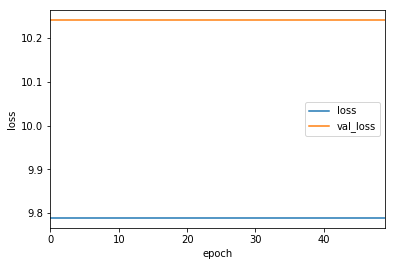

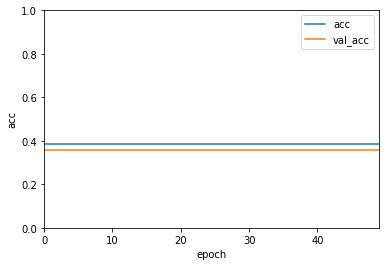

In [36]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,validation_data=(X_test, y_test))

# 各epochにおけ損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

* 確認事項
  * 値が全然改善されない。原因がわからず。すいません。もっと時間をかけて調べたかったですが、今週はあまり時間をとれませんでした。
  

# 7. 決定木で実装

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

clf = DecisionTreeClassifier(criterion="entropy", max_depth=100, max_features = 20, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test_pred, y_test)

print('テストデータの正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)
# テストデータのカテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('テストデータの適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('テストデータの再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('テストデータのF1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

# 決定木の描画
#dot_data = StringIO() #dotファイル情報の格納先
#export_graphviz(clf, out_file=dot_data,  
#                     feature_names=iris.feature_names,  
#                     class_names=iris.target_names,  
#                     filled=True, rounded=True,  
#                     special_characters=True) 
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

テストデータの正答率（Accuracy） = 58.311%
テストデータの適合率（Precision） = 68.111%
テストデータの再現率（Recall） = 66.004%
テストデータのF1値（F1-score） = 67.041%


* 確認事項
  * 結果は出たが、よくない。チューニングの仕方がわからず。すいません。もっと時間をかけて調べたかったですが、今週はあまり時間をとれませんでした。
  

# 7. 決定木で実装
Kerasでうまくいかなかったので、手組で実行。

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.activations import softmax, sigmoid
from common.grad import numerical_gradient
from common.loss import cross_entropy_error

In [38]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        
        # 重みの初期化
        self.params = {}
        init_std=0.01
        np.random.seed(1234)
        self.params["W1"] = init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
                
    def predict(self, x):
        """
        x : 入力データ
        """
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        h1 = np.dot(x, W1) + b1
        z1 = sigmoid(h1)
        h2 = np.dot(z1, W2) + b2
        y = softmax(h2)
        return y
    
    def loss(self, x, t):
        """
        x : 入力データ
        t : 正解データ
        """
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss
    
    def gradient(self, x, t):
        def f(W):
            return self.loss(x,t)
        grads={}
        grads["W1"] = numerical_gradient(f, self.params["W1"])
        grads["b1"] = numerical_gradient(f, self.params["b1"])
        grads["W2"] = numerical_gradient(f, self.params["W2"])
        grads["b2"] = numerical_gradient(f, self.params["b2"])
        return grads
    
    def accuracy(self, x, t):
        """
        識別精度を算出する関数
        """
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        return np.sum(y==t) / x.shape[0]  

In [42]:
epochs = 30
batch_size = 64
lr = 0.01

# 繰り返し回数
xsize = X_train.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=37, hidden_size=50, output_size=1)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        X_train = X_train[mask]
        y_train = y_train[mask]
        
        # 勾配の計算
        grads = tnet.gradient(X_train, y_train)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    ## 学習経過の記録
    
    # 訓練データにおけるloss
    train_loss.append(tnet.loss(X_train, y_train))
    
    # テストデータにおけるloss
    test_loss.append(tnet.loss(X_test, y_test))
    
    # 訓練データにて精度を確認
    train_accuracy.append(tnet.accuracy(X_train, y_train))

    # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy(X_test, y_test))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29


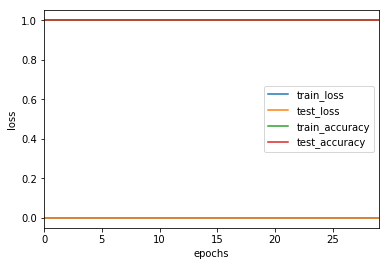

,train_loss,test_loss,train_accuracy,test_accuracy
0,-3.593750e-08,-3.576300e-08,1.0,1.0
1,-3.593750e-08,-3.576300e-08,1.0,1.0
2,-3.593750e-08,-3.576300e-08,1.0,1.0
3,-3.593750e-08,-3.576300e-08,1.0,1.0
4,-3.593750e-08,-3.576300e-08,1.0,1.0
5,-3.593750e-08,-3.576300e-08,1.0,1.0
6,-3.593750e-08,-3.576300e-08,1.0,1.0
7,-3.593750e-08,-3.576300e-08,1.0,1.0
8,-3.593750e-08,-3.576300e-08,1.0,1.0
9,-3.593750e-08,-3.576300e-08,1.0,1.0


In [44]:
# lossのグラフ化

df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()
display(df_log)